# Load and clean data

In [3]:
# Import necessary libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Load the dataset from Hugging Face 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Clean up the 'job_posted_date' column by converting it to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode()

In [19]:
df_exploded = df.explode('job_skills')

In [34]:
df_skills_count = (
    df_exploded
    .groupby(['job_title_short', 'job_skills'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)
df_skills_count

,job_title_short,job_skills,count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


# Dynamic Selection of Skills

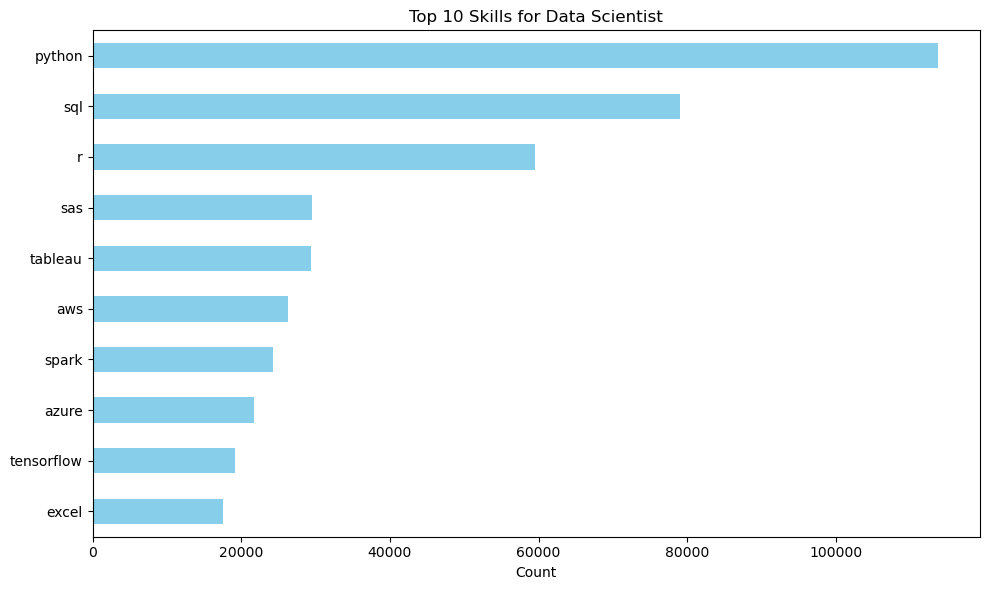

In [53]:
# Define variables for job title and number of top skills to display
job_title_short = 'Data Scientist'  # Change this to the desired job title
num_top_skills = 10  # Change this to the desired number of top skills

# Filter the exploded DataFrame for the selected job title
filtered_data = df_skills_count[df_skills_count['job_title_short'] == job_title_short].head(num_top_skills)

# Plot the top skills
filtered_data.plot(kind='barh', x='job_skills', y='count', legend=False, figsize=(10, 6), color='skyblue')
plt.title(f'Top {num_top_skills} Skills for {job_title_short}')
plt.xlabel('Count')
plt.ylabel('')
plt.gca().invert_yaxis()  # Invert the Y-axis to have the top skill at the top
plt.tight_layout()
plt.show()